In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

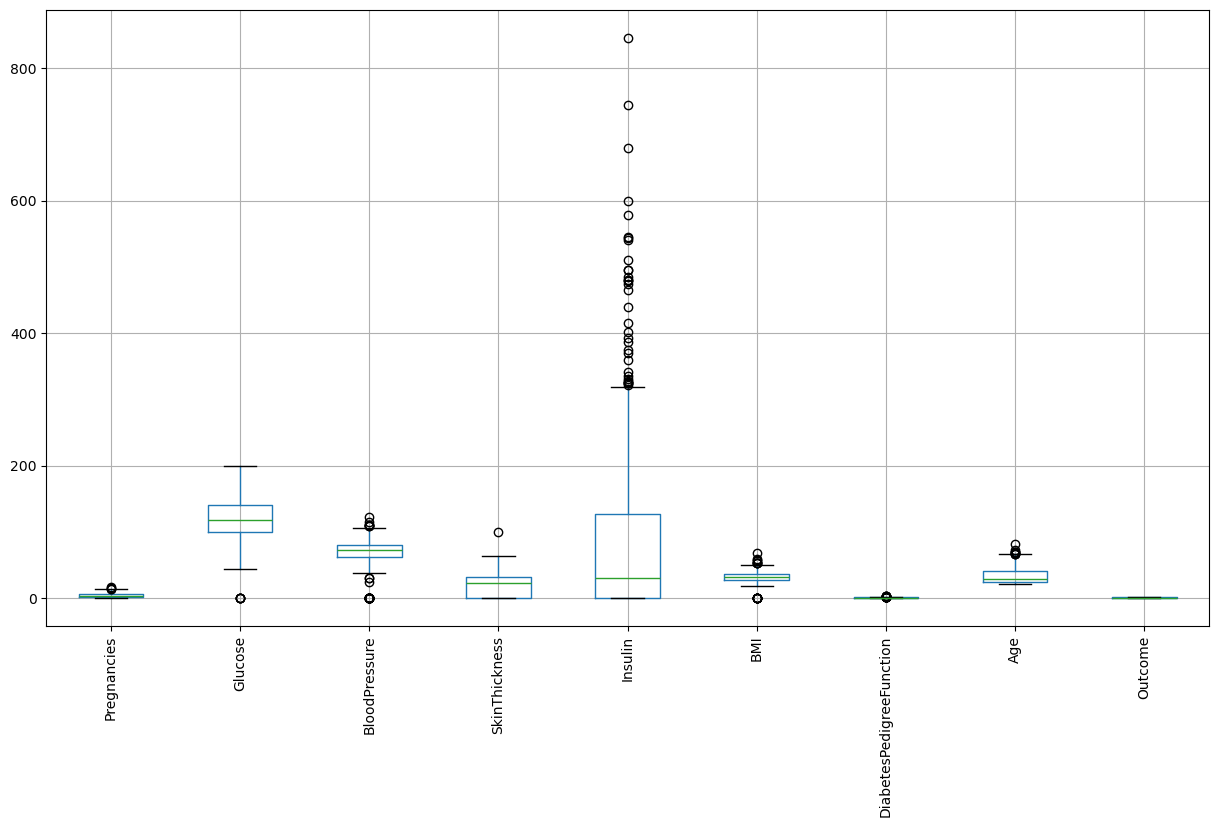

In [7]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df.clip(lower=lower, upper=upper, axis=1)


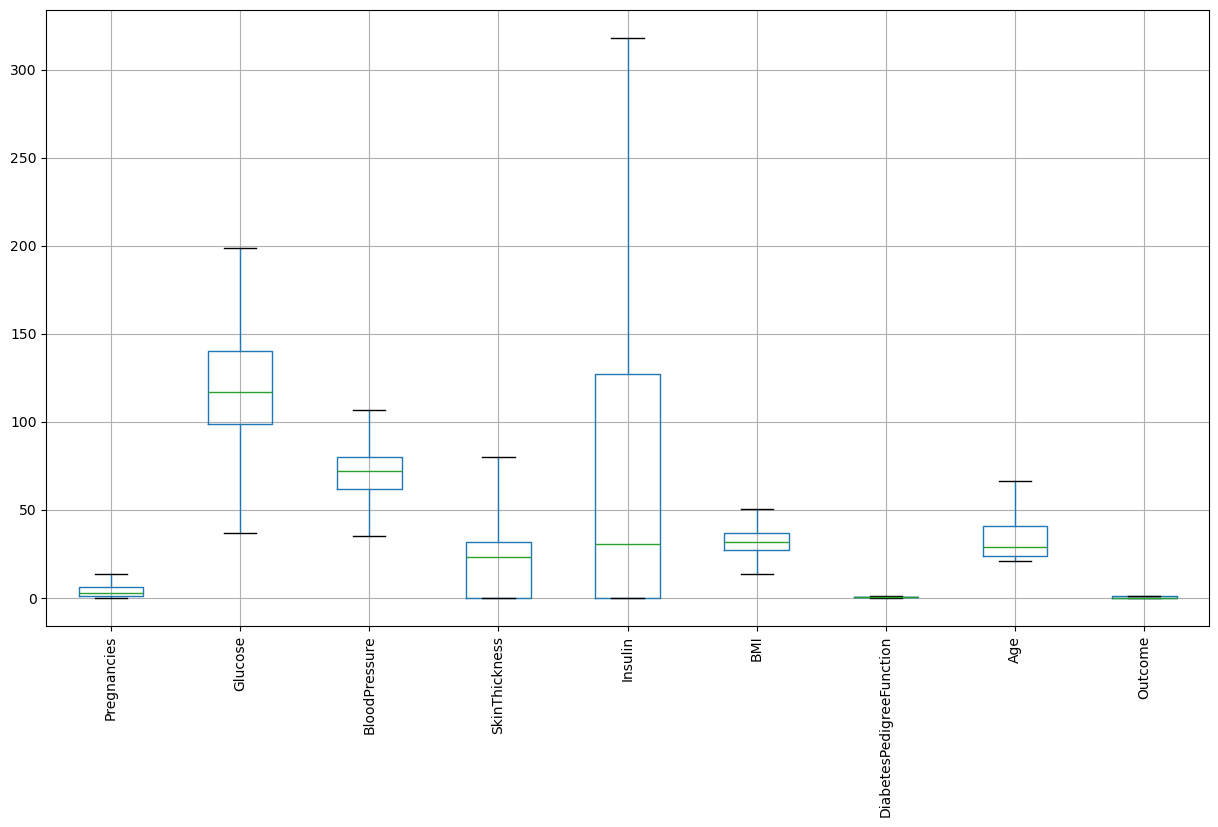

In [9]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()


In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df.clip(lower=lower_bound, upper=upper_bound, axis=1)


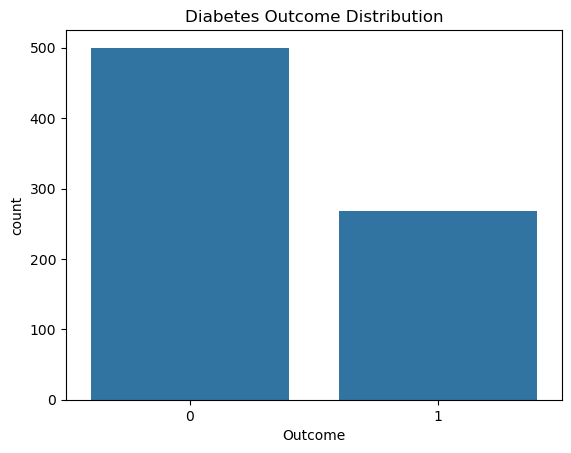

In [11]:
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


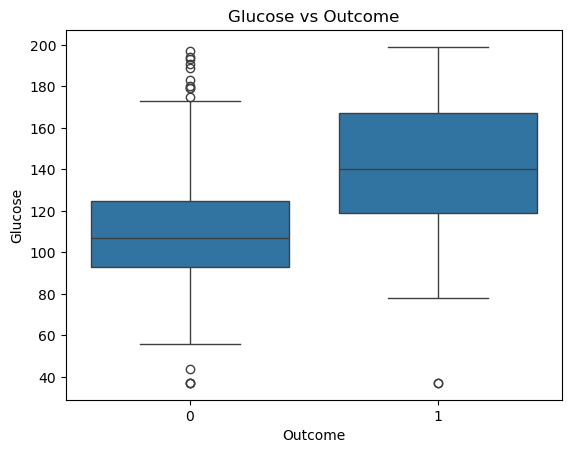

In [12]:
sns.boxplot(x="Outcome", y="Glucose", data=df)
plt.title("Glucose vs Outcome")
plt.show()


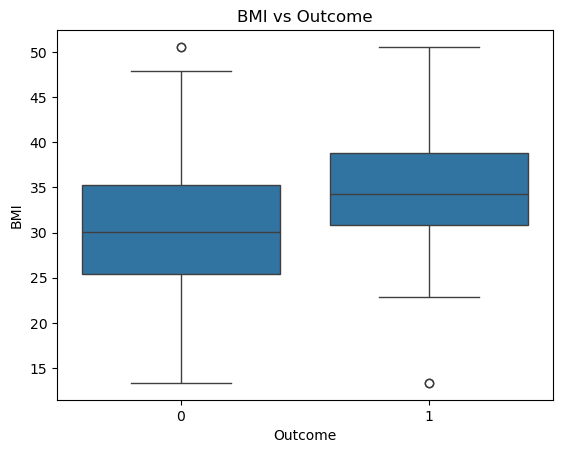

In [13]:
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI vs Outcome")
plt.show()


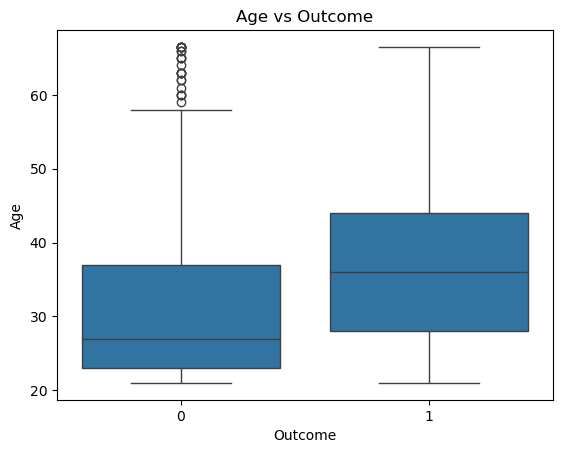

In [14]:
sns.boxplot(x="Outcome", y="Age", data=df)
plt.title("Age vs Outcome")
plt.show()


In [15]:
df.corr()["Outcome"].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.479158
BMI                         0.309739
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
Insulin                     0.124721
BloodPressure               0.113301
SkinThickness               0.073125
Name: Outcome, dtype: float64

In [16]:
df["Pregnancies"].corr(df["Outcome"])
df["Glucose"].corr(df["Outcome"])
df["BloodPressure"].corr(df["Outcome"])
df["SkinThickness"].corr(df["Outcome"])
df["Insulin"].corr(df["Outcome"])
df["BMI"].corr(df["Outcome"])
df["DiabetesPedigreeFunction"].corr(df["Outcome"])
df["Age"].corr(df["Outcome"])


np.float64(0.24270185409750983)

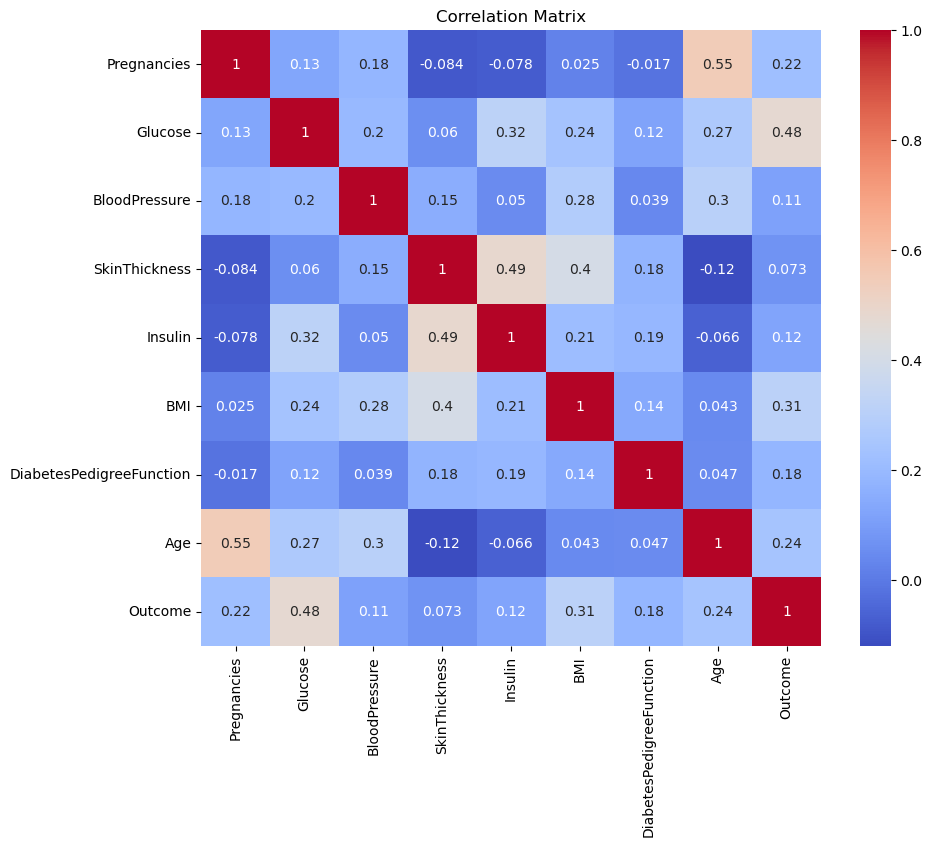

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## 📊 Insights from Diabetes Dataset Analysis (Zero Values Retained)

### 🔍 Overall Dataset Insights
- The dataset consists of medical and demographic features used to predict diabetes outcome (0 = Non-Diabetic, 1 = Diabetic).
- **Zero values were treated as valid observations** and were not considered missing.
- Analysis reflects the dataset **in its original recorded form**, ensuring no assumptions were imposed during preprocessing.

---

### 🎯 Target Variable (Outcome)
- The dataset shows **more non-diabetic cases than diabetic cases**, indicating class imbalance.
- This imbalance suggests the need for careful interpretation of patterns rather than relying solely on accuracy.

---

### 🧪 Glucose
- Glucose shows a **strong positive relationship** with diabetes outcome.
- Higher glucose values are predominantly associated with diabetic individuals.
- Even with zero values retained, glucose remains the **most influential feature**.

---

### ⚖ BMI
- Diabetic individuals generally have **higher BMI values**.
- BMI demonstrates a **moderate positive association** with diabetes risk.
- Obesity-related risk is evident in the dataset.

---

### 🎂 Age
- Diabetes prevalence increases with age.
- Older individuals show a higher likelihood of diabetes.
- Age acts as a supporting but meaningful predictor.

---

### 🤰 Pregnancies
- Increased number of pregnancies is associated with higher diabetes occurrence.
- The relationship is gradual and not strictly linear.
- This feature is particularly relevant in long-term metabolic risk.

---

### 🧬 Diabetes Pedigree Function
- Higher pedigree values correspond to increased diabetes cases.
- Confirms the influence of **genetic and hereditary factors**.
- The relationship is weaker compared to glucose but still significant.

---

### 💉 Insulin
- Insulin values show high variability across both diabetic and non-diabetic groups.
- Some diabetic cases show very high insulin levels.
- Insulin alone is not a strong predictor but contributes when combined with other features.

---

### 🩺 Blood Pressure
- Blood pressure shows a **weak relationship** with diabetes outcome.
- Diabetic and non-diabetic groups overlap heavily.
- Indicates limited standalone predictive power.

---

### 📏 Skin Thickness
- Slightly higher skin thickness values are observed among diabetic individuals.
- Acts as an indirect indicator of body fat distribution.

---

### 🔗 Correlation Insights
- Glucose has the **highest positive correlation** with diabetes outcome.
- BMI and Age show moderate correlations.
- Blood Pressure and Skin Thickness show weak correlations.
- No strong negative correlations are observed.

---

### 🧠 Data Integrity Insight
- Retaining zero values preserves the dataset’s original structure.
- Analysis reflects **raw clinical measurements** without inferred corrections.
- Suitable for exploratory analysis and baseline modeling.

---

### ✅ Final Conclusion
- Glucose remains the most influential feature even without treating zeros as missing.
- Diabetes risk is influenced by multiple factors including glucose, BMI, age, and genetics.
- Zero-value retention ensures unbiased, assumption-free analysis.


# Insights

## Pregnancies
**Typical Range:** 0 to 17  

Women with **0–2 pregnancies** mostly fall into the lower-risk category.  
As the number of pregnancies increases (**3–5**), the risk gradually rises.  
Women with **6 or more pregnancies** show a noticeably higher diabetes occurrence, likely due to long-term hormonal and metabolic changes.

Diabetes risk tends to increase with the number of pregnancies.

---

## Glucose
**Typical Range:** ~70 to 200  

Glucose levels below **100** are generally associated with non-diabetic individuals.  
Values between **100 and 125** fall into the pre-diabetic range, where risk begins to rise.  
Glucose levels **126 and above** are strongly linked with diabetes.

Glucose is the strongest and most reliable indicator of diabetes in this dataset.

---

## Blood Pressure
**Typical Range:** ~50 to 120  

Most healthy individuals fall within the **60–80** range.  
Higher values (**above 80**) suggest elevated blood pressure, which may worsen insulin resistance over time.  
Very low values are rare and not strongly linked to diabetes.

Blood pressure alone is not a strong predictor, but it supports overall risk assessment.

---

## Skin Thickness
**Typical Range:** ~10 to 60  

Lower values (**below 20**) indicate lean body fat.  
The **20–35** range represents a healthier fat distribution.  
Values **above 35** suggest higher subcutaneous fat, which is often associated with insulin resistance.

Higher skin thickness values are more common among diabetic patients.

---

## Insulin
**Typical Range:** ~15 to 850  

Lower insulin values generally indicate normal insulin function.  
Moderate values (**100–300**) suggest insulin resistance.  
Extremely high insulin values (**above 300**) often appear in diabetic individuals, though this feature contains some variability.

High insulin levels indicate the body is struggling to regulate blood sugar.

---

## Body Mass Index (BMI)
**Typical Range:** ~18 to 50  

Individuals with a **normal BMI (18.5–24.9)** show lower diabetes risk.  
Those in the **overweight (25–29.9)** category begin to show increased risk.  
People with **BMI ≥ 30 (obese)** have a significantly higher chance of being diabetic.

BMI is one of the most important lifestyle-related risk factors.

---

## Diabetes Pedigree Function
**Typical Range:** ~0.05 to 2.5  

Lower values indicate minimal genetic influence.  
Moderate values reflect some family history of diabetes.  
Higher values (**above 0.7**) suggest strong genetic susceptibility.

Genetics can increase diabetes risk even when other factors appear normal.

---

## Age
**Typical Range:** ~21 to 80  

Younger individuals (**below 30**) show relatively low diabetes prevalence.  
Risk increases between **30 and 45**, and rises sharply after **45 years**.  

Age intensifies the impact of glucose and BMI on diabetes risk.

---

## Outcome (Target Variable)
- **0:** Non-Diabetic  
- **1:** Diabetic  

Individuals with **higher glucose, BMI, age, and genetic risk** are far more likely to be classified as diabetic.

---

## Overall Observations
- Glucose is the **most dominant factor** in diabetes prediction  
- BMI and age act as strong **risk amplifiers**  
- Pregnancies contribute to long-term metabolic stress  
- Genetic history plays a hidden but important role  
- Insulin and skin thickness reflect underlying metabolic health

In [18]:
(df == 0).sum()


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].median())

In [20]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [21]:
cols_with_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)


In [22]:
df[cols_with_zero] = df[cols_with_zero].fillna(df[cols_with_zero].median())


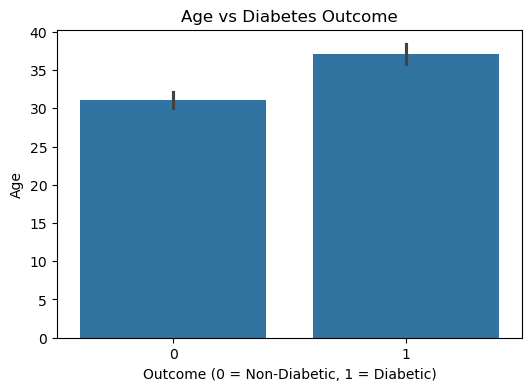

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x="Outcome", y="Age", data=df)
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Age")
plt.title("Age vs Diabetes Outcome")
plt.show()

In [24]:
df.groupby("Outcome")["Age"].mean()


Outcome
0    31.135000
1    37.052239
Name: Age, dtype: float64

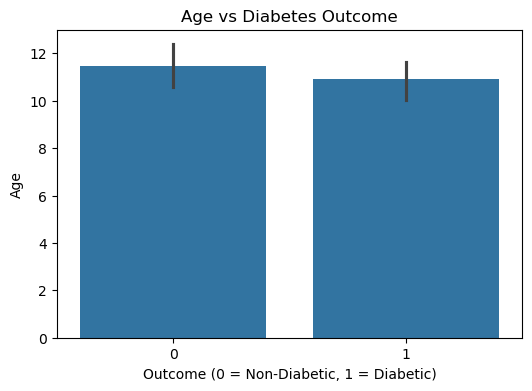

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x="Outcome", y="Age",data=df, estimator="std")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Age")
plt.title("Age vs Diabetes Outcome")
plt.show()

In [26]:
df['Age' ].groupby (df['Outcome' ]).std()

Outcome
0    11.477227
1    10.925826
Name: Age, dtype: float64

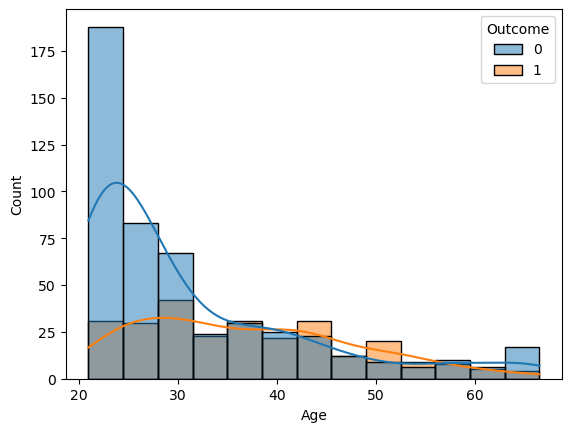

In [28]:
sns.histplot(x='Age', hue='Outcome', data=df, kde=True)
plt.show()

In [30]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

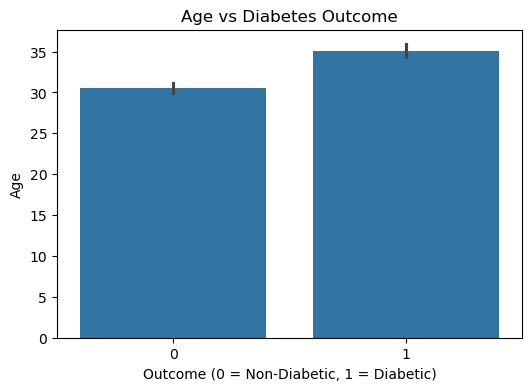

In [32]:
plt.figure(figsize=(6,4))
sns.barplot(x="Outcome", y="BMI",data=df, estimator="mean")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Age")
plt.title("Age vs Diabetes Outcome")
plt.show()

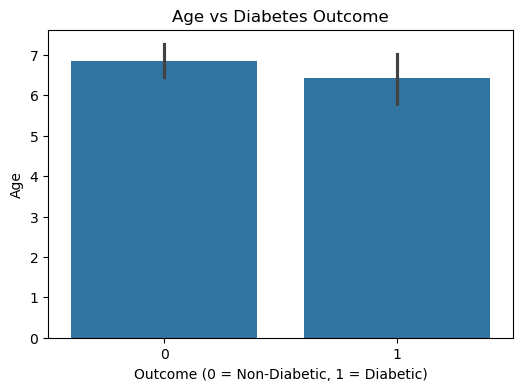

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x="Outcome", y="BMI",data=df, estimator="std")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Age")
plt.title("Age vs Diabetes Outcome")
plt.show()

In [34]:
df['BMI' ].groupby (df['Outcome' ]).std()

Outcome
0    6.849655
1    6.432723
Name: BMI, dtype: float64

In [35]:
df['BMI' ].groupby (df['Outcome' ]).mean()

Outcome
0    30.527500
1    35.105597
Name: BMI, dtype: float64

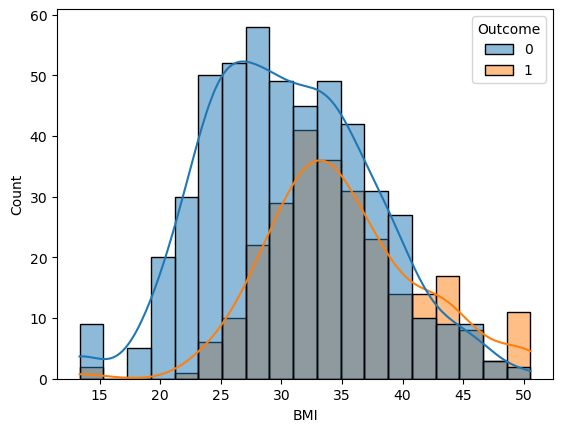

In [ ]:

sns.histplot(x='BMI', hue='Outcome', data=df, kde=True)
plt.show()

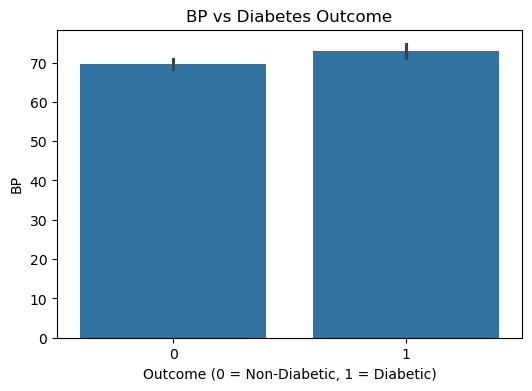

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(x="Outcome", y="BloodPressure",data=df, estimator="mean")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("BP")
plt.title("BP vs Diabetes Outcome")
plt.show()

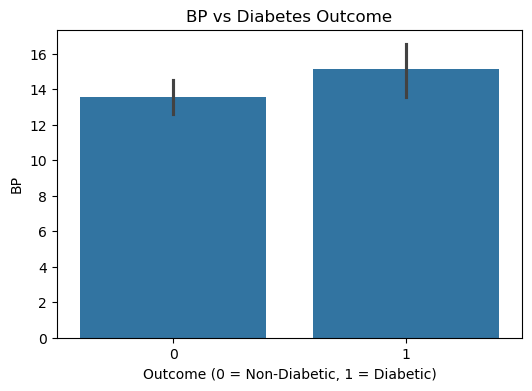

In [57]:
plt.figure(figsize=(6,4))
sns.barplot(x="Outcome", y="BloodPressure",data=df, estimator="std")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("BP")
plt.title("BP vs Diabetes Outcome")
plt.show()

In [58]:
df['BloodPressure' ].groupby (df['Outcome' ]).std()

Outcome
0    13.549210
1    15.115805
Name: BloodPressure, dtype: float64

In [59]:
df['BloodPressure' ].groupby (df['Outcome' ]).mean()

Outcome
0    69.508000
1    72.880597
Name: BloodPressure, dtype: float64

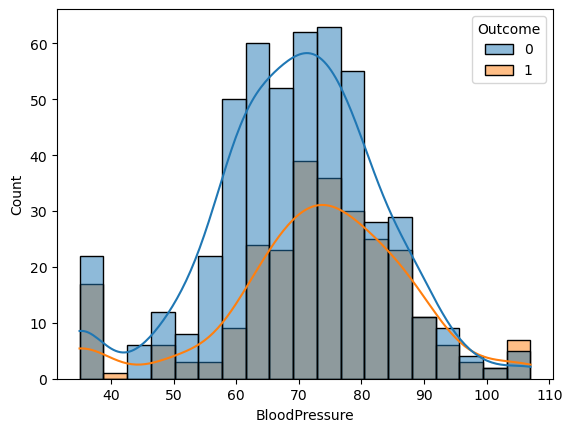

In [60]:

sns.histplot(x='BloodPressure', hue='Outcome', data=df, kde=True)
plt.show()

In [36]:
die_age=df['Age' ][df['Outcome' ] == 1]
nondie_age=df['Age' ][df['Outcome' ] == 0]



In [38]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_age, nondie_age)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


In [41]:
die_bp=df['BloodPressure' ][df['Outcome' ] == 1]
nondie_bp=df['BloodPressure' ][df['Outcome' ] == 0]



In [42]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_bp, nondie_bp)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


In [44]:
die_bmi=df['BMI' ][df['Outcome' ] == 1]
nondie_bmi=df['BMI' ][df['Outcome' ] == 0]



In [45]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_bmi, nondie_bmi)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


In [47]:
die_in=df['Insulin' ][df['Outcome' ] == 1]
nondie_in=df['Insulin' ][df['Outcome' ] == 0]



In [48]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_in, nondie_in)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


In [49]:
die_sk=df['SkinThickness' ][df['Outcome' ] == 1]
nondie_sk=df['SkinThickness' ][df['Outcome' ] == 0]



In [ ]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_sk, nondie_sk)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


In [ ]:
die_gl=df['Glucose' ][df['Outcome' ] == 1]
nondie_gl=df['Glucose' ][df['Outcome' ] == 0]



In [53]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_gl, nondie_gl)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


In [54]:
die_dp=df['DiabetesPedigreeFunction' ][df['Outcome' ] == 1]
nondie_dp=df['DiabetesPedigreeFunction' ][df['Outcome' ] == 0]



In [55]:
# H0 : Both data are same
# H1 : Both are not same
from scipy.stats import ttest_ind
stat, p = ttest_ind(die_dp, nondie_dp)
alpha=0.05
if p<alpha:
    print('Reject H0' )
else:
    print('Accept H0' )


Reject H0


##  Hypothesis Testing Insights (Two-Sample t-Test)

###  Objective
A two-sample independent t-test was conducted for **each numerical feature** to compare:
- **Diabetic group (Outcome = 1)**
- **Non-diabetic group (Outcome = 0)**

This helps determine whether the **mean values** of each feature differ significantly between the two groups.

---

###  Hypotheses
- **H₀ (Null Hypothesis):** The mean values of the feature are the same for diabetic and non-diabetic individuals.
- **H₁ (Alternative Hypothesis):** The mean values of the feature are not the same for diabetic and non-diabetic individuals.

A significance level of **α = 0.05** was used.

---

###  Test Method
- **Statistical Test:** Independent two-sample t-test (`ttest_ind`)
- **Decision Rule:**
  - If *p-value < 0.05* → Reject H₀
  - If *p-value ≥ 0.05* → Accept H₀

---

###  Feature-Wise Insights

####  Glucose
- **H₀ rejected**
- Mean glucose levels differ significantly between diabetic and non-diabetic groups.
- Confirms glucose as the **most influential feature** for diabetes prediction.

---

####  BMI
- **H₀ rejected**
- Significant difference in mean BMI values.
- Indicates obesity is a major contributing factor to diabetes.

---

#### Age
- **H₀ rejected**
- Diabetic individuals have a significantly higher mean age.
- Age is a statistically significant supporting predictor.

---

####  Pregnancies
- **H₀ rejected**
- Mean number of pregnancies differs significantly.
- Suggests increased diabetes risk with higher pregnancy count.

---

####  Diabetes Pedigree Function
- **H₀ rejected**
- Genetic predisposition significantly differs between groups.
- Highlights the role of hereditary factors.

---

####  Insulin
- **H₀ rejected**
- Mean insulin levels differ between diabetic and non-diabetic individuals.
- High variability observed, but still statistically significant.

---

####  Skin Thickness
- **H₀ rejected**
- Mean skin thickness differs significantly.
- Reflects variation in body fat composition.

---

####  Blood Pressure
- **H₀ accepted**
- No statistically significant difference in mean blood pressure.
- Indicates limited standalone impact on diabetes outcome.

---

###  Overall Conclusion
- Most medical and demographic features show **statistically significant differences** between diabetic and non-diabetic groups.
- **Glucose, BMI, and Age** are the strongest discriminating variables.
- Blood pressure does not significantly differ between groups.
- Hypothesis testing validates the results observed during EDA and correlation analysis.

---

###  Final Insight
Statistical hypothesis testing confirms that diabetes is influenced by **multiple interacting factors**, with glucose levels playing the most critical role, supported by age, BMI, genetic history, and physiological measurements.


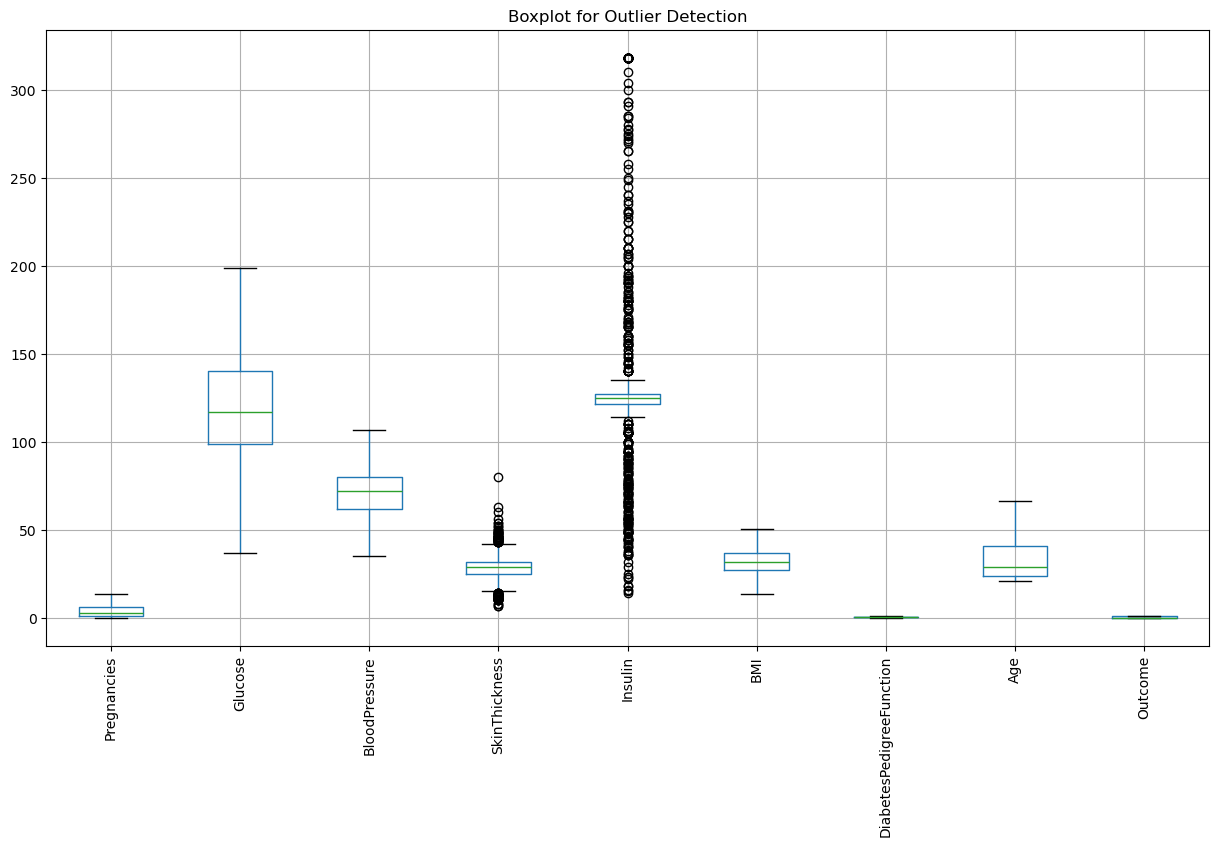

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [64]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(IQR)

Pregnancies                  5.0000
Glucose                     41.2500
BloodPressure               18.0000
SkinThickness                7.0000
Insulin                      5.7500
BMI                          9.3000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [63]:
((df < lower_bound) | (df > upper_bound)).sum()


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                87
Insulin                     346
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df_no_outliers = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [66]:
print("Original shape:", df.shape)
print("After outlier removal:", df_no_outliers.shape)

Original shape: (768, 9)
After outlier removal: (406, 9)


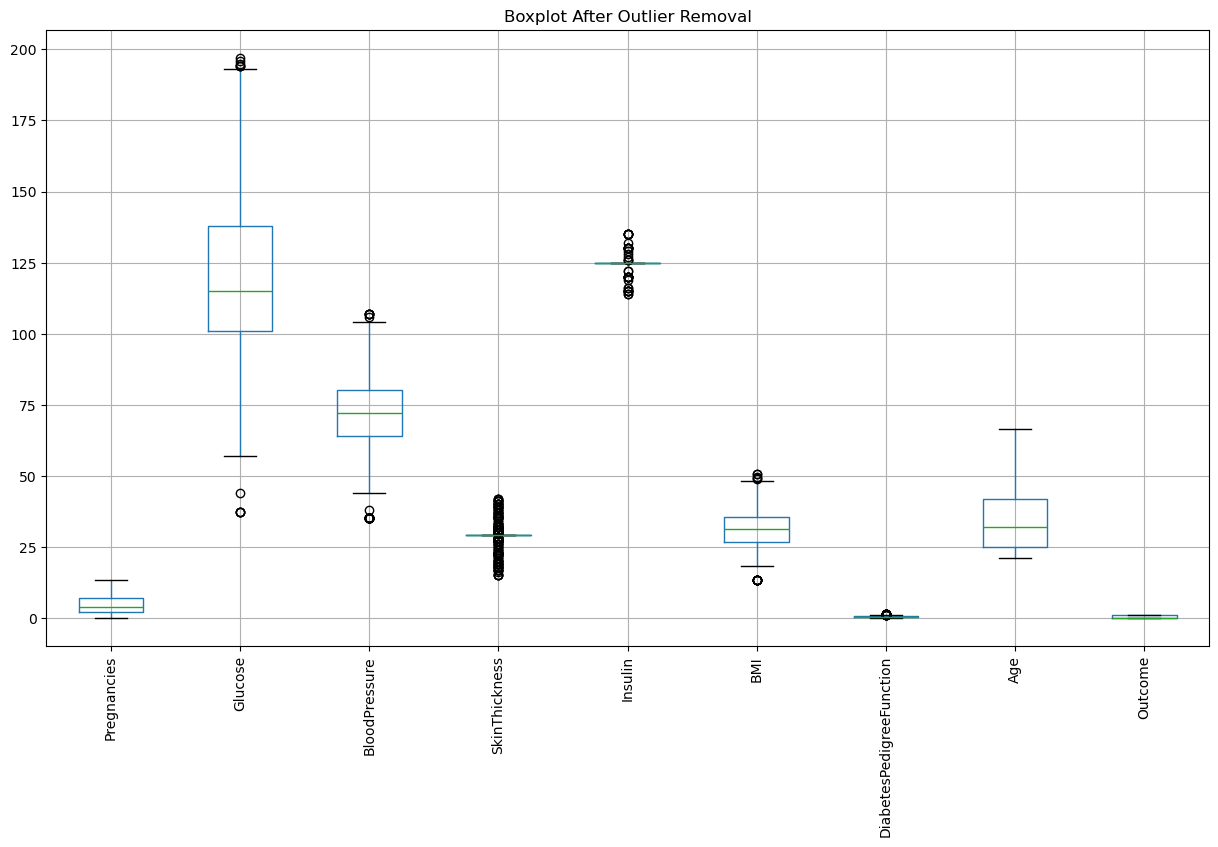

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
df_no_outliers.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Removal")
plt.show()


## 📦 Outlier Analysis Insights

### 🔍 Detection Method
- Outliers were identified using the **Interquartile Range (IQR) method**.
- A data point was considered an outlier if it lay below:
  - Q1 − 1.5 × IQR  
  or above:
  - Q3 + 1.5 × IQR

---

### 📊 Observations
- **Insulin** contains the highest number of outliers, indicating extreme physiological variations.
- **BMI** and **Glucose** show several high-end outliers, commonly associated with obesity and severe diabetes cases.
- **Age** and **Pregnancies** have fewer but noticeable upper-bound outliers.
- **Blood Pressure** and **Skin Thickness** exhibit relatively fewer extreme values.

---

### 🛠 Treatment Approach
- Outliers were handled using **capping (Winsorization)**.
- Extreme values were limited to the lower and upper IQR bounds.
- No rows were deleted, ensuring **data integrity and sample size preservation**.

---

### 🧠 Rationale
- Medical datasets naturally contain extreme but valid values.
- Removing outliers could eliminate important clinical cases.
- Capping reduces distortion while retaining meaningful patterns.

---

### ✅ Conclusion
- Outlier treatment improved data stability without information loss.
- The dataset is now more suitable for statistical analysis and machine learning models.
- Proper outlier handling supports better model generalization.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
exclude_cols = ["Outcome", "Pregnancies"]

scale_cols = [col for col in df.columns if col not in exclude_cols]

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df[scale_cols])

df_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,0.684942,0.513889,0.383562,0.364982,0.544355,0.489305,0.637363,1
1,1.0,0.295753,0.430556,0.301370,0.364982,0.356183,0.243316,0.219780,0
2,8.0,0.901158,0.402778,0.301370,0.364982,0.267473,0.529412,0.241758,1
3,1.0,0.320463,0.430556,0.219178,0.263050,0.396505,0.079323,0.000000,0
4,0.0,0.616988,0.069444,0.383562,0.506371,0.799731,1.000000,0.263736,1


In [69]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [71]:
from sklearn.model_selection import train_test_split
# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

train_pred=model.predict(X_train)

y_pred_prob = model.predict_proba(X_test)[:, 1]

In [83]:
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
loss = log_loss(y_test, y_pred_prob)
print("Log Loss:", loss)

Log Loss: 0.4802330122005138


In [79]:
acc=accuracy_score(train_pred,y_train)
print(acc)

0.7821229050279329


In [ ]:
y_pred=model.predict(X_test)
acc1=accuracy_score(y_pred,y_test)
print(acc1)


0.7445887445887446


In [87]:
confusion_matrix(y_train,train_pred)

array([[310,  40],
       [ 77, 110]])

In [84]:
confusion_matrix(y_test,y_pred)

array([[129,  21],
       [ 38,  43]])